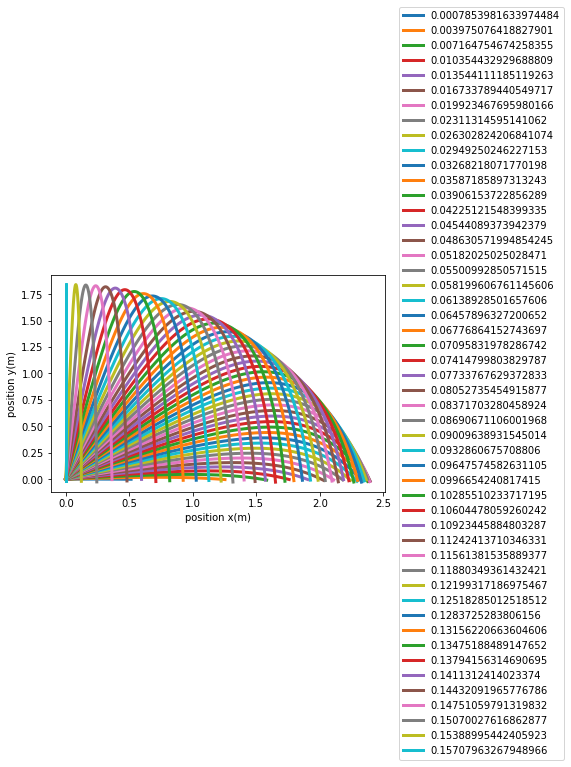

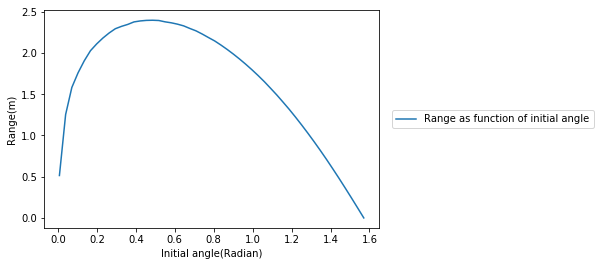

Maximum range 2.397 m occurs at initial angle 0.486 Radian


In [4]:
# Challenge problem 2.4

%matplotlib inline
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ColorConverter as cc
import math

class particle2(object):
    
    def __init__(self, mass=1., x=0., y=0., vx=0., vy=0.):
        self.mass = mass
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
       
    def euler(self, fx, fy, dt):
        self.vx = self.vx + fx/self.mass*dt
        self.vy = self.vy + fy/self.mass*dt
        self.x = self.x + self.vx*dt
        self.y = self.y + self.vy*dt
        
        
g = 9.8            # g acceleration
v0 = 30.           # initial velocity
# setting k/m =1
dt = 0.01           # time step

colors = ['red','orange','yellow','green','magenta','cyan','blue','purple','black']

angle_range = np.linspace(0.05,10,50)
range_list = []
new_angle_list = []

for i in range(0,len(angle_range)):
    angle = angle_range[i]*0.1*math.pi/2
    x = [0]                                  # we need to initialize the arrays for each value of the angle
    y = [0]
    vx = [math.cos(angle)*v0] 
    vy = [math.sin(angle)*v0] 
    t = [0.]

    p = particle2(1., 0., 0., vx[0], vy[0])
    while p.y >= 0. and vx[-1]>=0:
        v = math.sqrt(vx[-1]**2 + vy[-1]**2)
        fy = -g - v*vy[-1]
        fx = -v*vx[-1] 
        p.euler(fx, fy, dt)
        x.append(p.x)
        y.append(p.y)
        vx.append(p.vx)
        vy.append(p.vy)
        t.append(t[-1]+dt)
    
    t_data = np.array(t) # we convert the list into a numpy array for plotting
    x_data = np.array(x)
    y_data = np.array(y)
    vx_data = np.array(vx)
    vy_data = np.array(vy)
    range_list.append(x_data[len(x_data)-1])
    new_angle_list.append(angle)
    
    my_plot = pyplot.plot(x_data, y_data,  ls='-', lw=3, label = str(angle*0.1))
    pyplot.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

pyplot.xlabel('position x(m)')
pyplot.ylabel('position y(m)')
pyplot.show()

angle_array = np.array(new_angle_list)
range_array = np.array(range_list)

pyplot.plot(angle_array, range_array, label ='Range as function of initial angle')
pyplot.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
pyplot.xlabel('Initial angle(Radian)')
pyplot.ylabel('Range(m)')
pyplot.show()

print("Maximum range","{0:.3f}".format(np.max(range_array)),"m occurs at initial angle", "{0:.3f}".format(angle_array[np.argmax(range_array)]) ,"Radian")